#  <font face="Times New Roman" color='PURPLE' style="text-shadow: 1px 1px #000000"  > IRIS FLOWER CLASSIFICATION

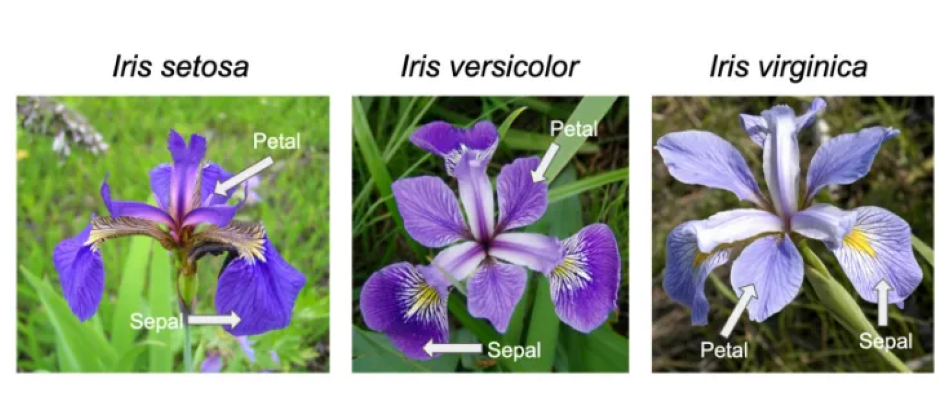

In [70]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Use raw string notation for the file path
plt.figure(figsize=(12,9))
img = mpimg.imread(r'C:\Users\DELL\Downloads\flowers.webp')
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

## <font face="Times New Roman" color='Purple' style="text-shadow: 1px 1px #000000"  > Objective:

The primary objective of this project is to design and implement a machine learning model that can accurately classify Iris flowers into their respective species (Setosa, Versicolor, and Virginica) based on physical characteristics such as sepal length, sepal width, petal length, and petal width.

## <font face="Times New Roman" color='Purple' style="text-shadow: 1px 1px #000000"  > Principle:
Using machine learning algorithms, predict the species by:

1. Analyzing feature patterns and relationships
2. Training models on labeled data
3. Evaluating model performance using accuracy metrics
    
## <font face="Times New Roman" color='Purple' style="text-shadow: 1px 1px #000000"  > Key Concepts:


1. EDL
2. Supervised Learning
3. Classification Algorithms ( Logistic Regression & SVM)
4. Model Evaluation ( Accuracy, Precision, Recall, F1-score)


## <font face="Times New Roman" color='Purple' style="text-shadow: 1px 1px #000000"  > Dataset Intro: 
The Iris Flower dataset was used, consisting of 150 samples with features for sepal length, sepal width, petal length, and petal width, classified into three species of Iris flowers.
Exploration: The dataset was explored for missing values, outliers, and class distribution. It was found to be clean and balanced.

## <font face="Times New Roman" color='Purple' style="text-shadow: 1px 1px #000000"  > Outlier Handling: 
Outliers were handled by clipping values, ensuring robust data for modeling.
Data Splitting: The dataset was split into training and testing sets to evaluate model performance.

## <font face="Times New Roman" color='Purple' style="text-shadow: 1px 1px #000000"  > Models Applied:
--Support Vector Machine (SVM)
    
    
--Logistic Regression


## <font face="Times New Roman" color='Purple' style="text-shadow: 1px 1px #000000"  > Accuracy: 
Both SVM and Logistic Regression achieved high accuracy scores (0.97) on the test set.

## <font face="Times New Roman" color='Purple' style="text-shadow: 1px 1px #000000"  > Cross-Validation: 
The mean cross-validation score for both models was also high (0.96), indicating consistency in performance.

## <font face="Times New Roman" color='Purple' style="text-shadow: 1px 1px #000000"  > Confusion Matrix & Classification Report: 
    
Both models performed flawlessly, with perfect precision, recall, and F1-score across all classes.

In [71]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [72]:
# Import the necessary libraries
df = pd.read_excel('Iris Flower.xlsx')

# <font face="Times New Roman" color='Purple' > Explore the data set 

In [73]:
# Display the first few rows of the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [75]:
# Check for any missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [76]:
# check for duplicates
df.duplicated().sum()

0

In [77]:
# Summary statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [78]:
# Check for size
df.size

900

In [79]:
# check for columns names 
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [80]:
# check for datatypes of each column
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [81]:
# lets drop the id column we have no use as of it,in this project .
df = df.drop(['Id'], axis=1)

In [82]:
# class distribution 
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# <font face="Times New Roman" color='Purple' > Class Distribution Visual

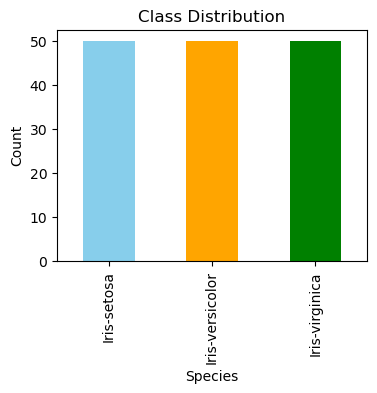

In [83]:
df.groupby('Species').size().plot(kind='bar', figsize=(4,3), color=['skyblue', 'orange', 'green'], 
                                  title='Class Distribution', xlabel='Species', ylabel='Count')
plt.show()

### Note : 
From the distribution we can see that all the flowers has equal contribution in the dataset which is good for our model

# <font face="Times New Roman" color='Purple' > Check for outliers 

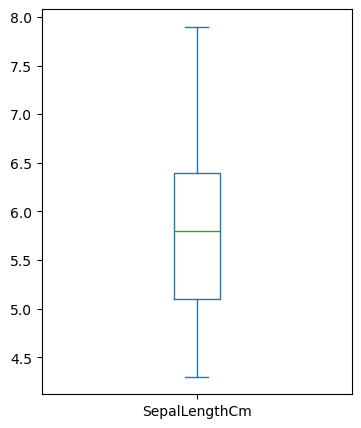

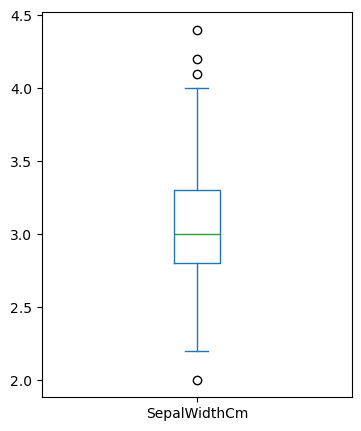

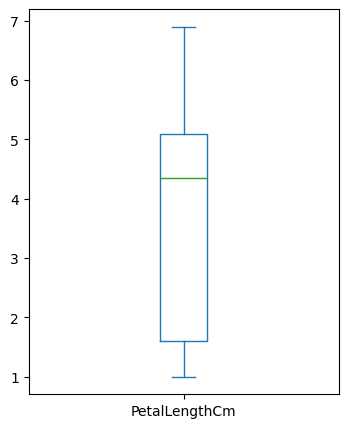

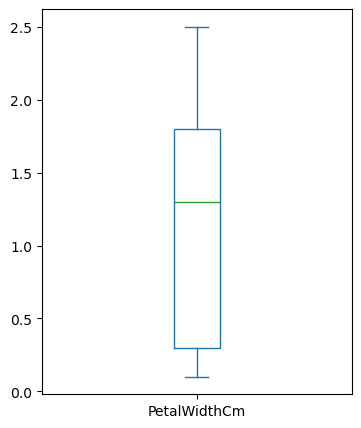

SepalLengthCm    None
SepalWidthCm     None
PetalLengthCm    None
PetalWidthCm     None
dtype: object

In [84]:
def plot_outliers(x):
    x.plot(kind='box', figsize=(4,5))
    plt.show()
df.select_dtypes(float).apply(plot_outliers)


# <font face="Times New Roman" color='Purple' > Handling for outliers 

In [85]:
def handle_out(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR=Q3-Q1
        lower_limit = Q1-1.5 *IQR
        upper_limit = Q1+1.5 *IQR
    df[column]=df[column].clip(lower_limit,upper_limit)
    return df
df =handle_out(df, ['SepalWidthCm'])

# <font face="Times New Roman" color='Purple' >check whether still the outlier exists or not  .

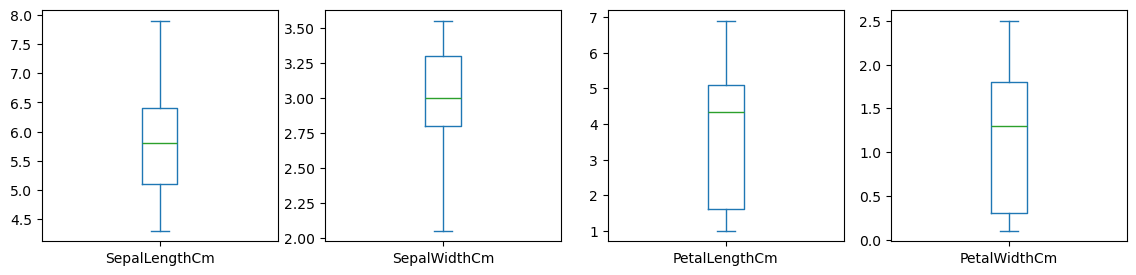

In [86]:
# now no outlier remains
df.select_dtypes(float).plot(kind='box',figsize=(14,3),subplots =True)
plt.show()

## <font face="Times New Roman" color='Purple' > Value distribution our dataset

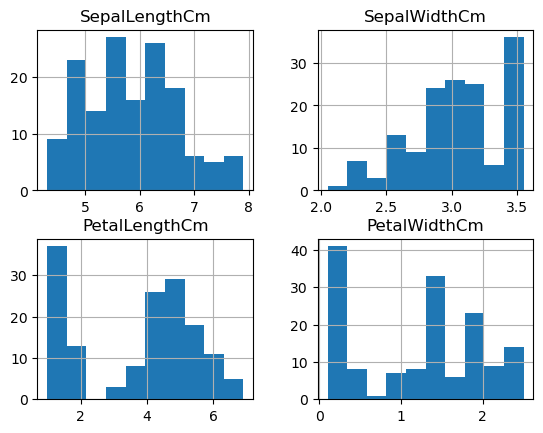

In [87]:
df.hist()
plt.show()

## Note :  
so from the box plot and histogram we can say that some of them is following the normal distribution so we can perform Model testing .


# <font face="Times New Roman" color='Purple' > Relationships between the dataset 

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

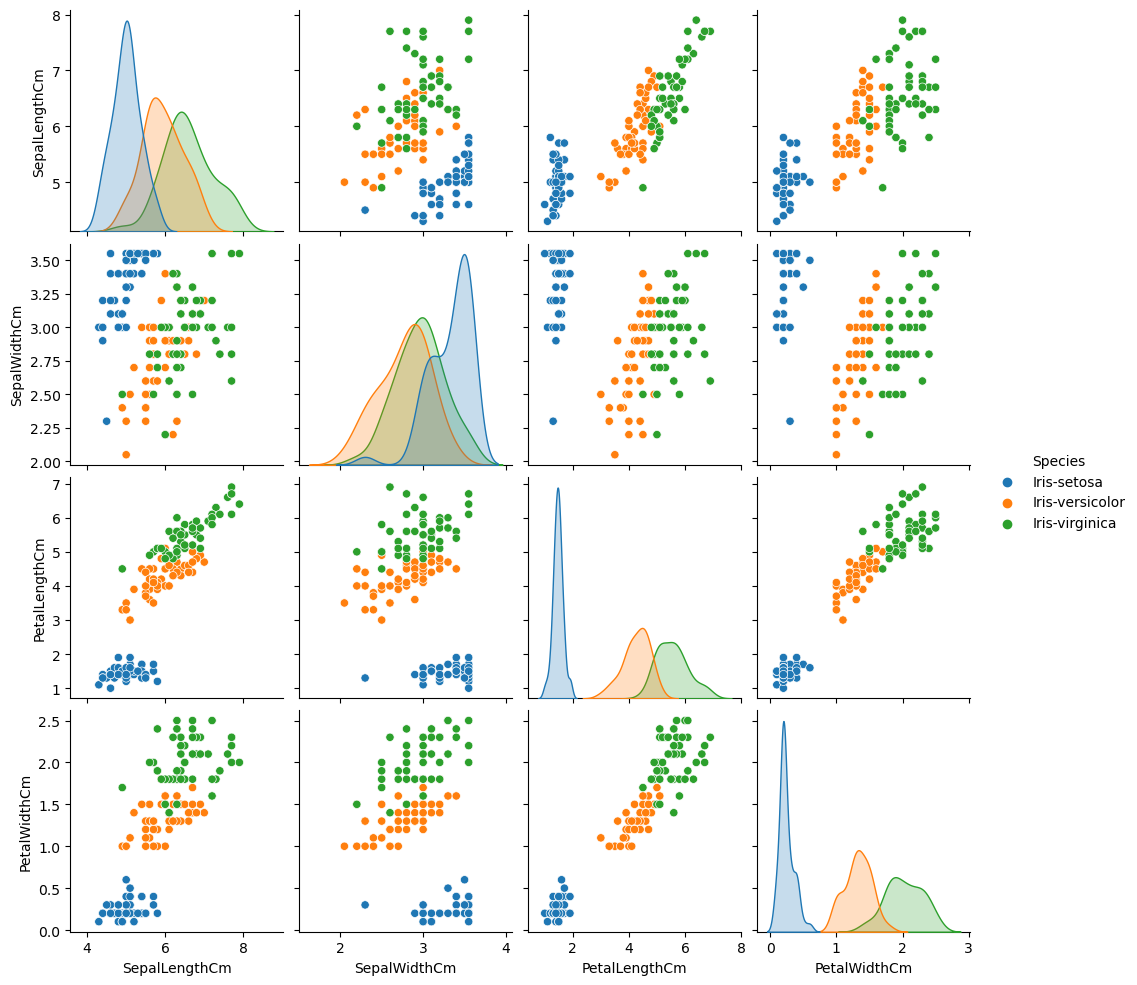

In [88]:
# multivariate scatter plots
sns.pairplot(df, hue = 'Species')
plt.show()

## Note:
- From the above visuals we can conclude that Iris -setosa is far away from the rest flowers , and even its the shortest in 
    comparision to other flowers
- secondly , we can also say that Iris-Virginica is the longest flower.
- we can aslo  conclude that PetalLengthCm and PetalWidthCm has strong relationship between them.

# <font face="Times New Roman" color='Purple' > Visual representation of features of flowers

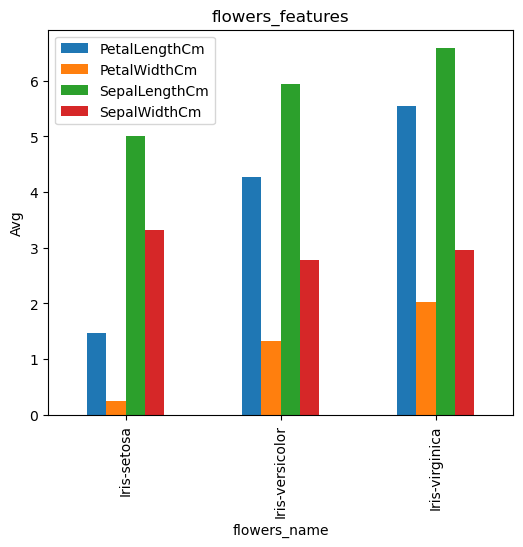

In [89]:
pivot_df = pd.pivot_table(data=df, index=['Species'], 
                           values=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], 
                           aggfunc='mean')

pivot_df.plot(kind='bar', figsize=(6,5))
plt.title("flowers_features")
plt.xlabel('flowers_name')
plt.ylabel('Avg')
plt.show()

# <font face="Times New Roman" color='Purple' > Data Modelling


## <font face="Times New Roman" color='orange ' > 1. Defining the X and Y

In [90]:
# our x will be the features of the flowers  ('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm')
X = df.drop(['Species'], axis=1)

# our y will be the label of flowers
Y = df['Species']
 
# we will split the data to 80% training and 20% to testing data 
X.head(2)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [91]:
Y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## <font face="Times New Roman" color='orange '  >  2.  Split the data to train and test dataset.

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [93]:
print('X_train : ', X_train.shape)
print('X_test : ', X_test.shape)
print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

X_train :  (112, 4)
X_test :  (38, 4)
y_train :  (112,)
y_test :  (38,)


## <font face="Times New Roman" color='orange ' > 3. Model building 

### <font face="Times New Roman" color='blue ' > 1. Support vector machine algorithm

In [94]:
# Here we imported a support vector classifier from the scikit-learn support vector machine.
from sklearn.svm import SVC

# Then, we created an object and named it svn.
svn = SVC()

# After that, we fit the training dataset into the algorithm by using the svn.fit() method.
svn.fit(X_train, y_train)


# Predict from the test dataset
# we predict the classes from the test dataset using our trained model.
predictions = svn.predict(X_test)

# Calculate and print the accuracy score 
print(accuracy_score(y_test, predictions))


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions, labels=df['Species'].unique())
print('________________')
conf_matrix

0.9736842105263158
________________


array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

## <font face="Times New Roman" color='purple ' > Plot confusion matrix


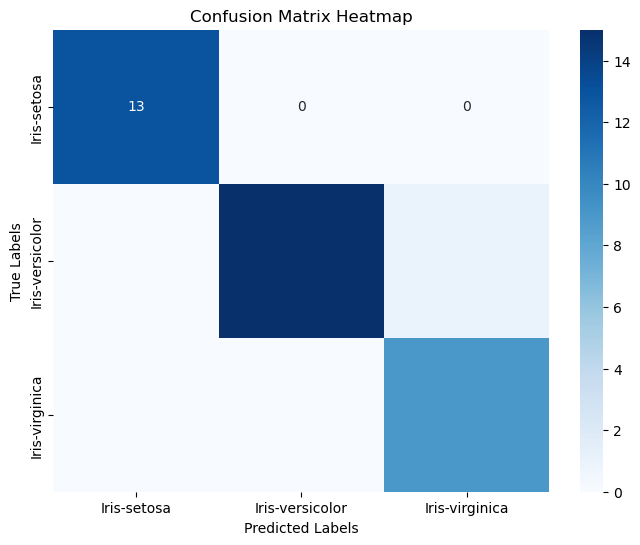

In [95]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', 
            xticklabels=df['Species'].unique(), yticklabels=df['Species'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

## <font face="Times New Roman" color='purple ' >A detailed classification report


In [96]:
print(classification_report(y_test, predictions))
                    

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



### Notes :
1. Precision: How often the model is correct when it says "yes".

2. Recall: How often the model catches all the "yes" instances.

3. F1-score: A balance of precision and recall.

4. Support: The number of instances in each class.

5. Accuracy: How often the model is correct overall.

6. Macro avg: Average performance across all classes.

7. Weighted avg: Average performance, considering the number of instances in each class.



## <font face="Times New Roman" color='blue ' > 2. Logistic regression algorithm

In [97]:
# Assuming df is already defined and contains the Iris dataset
X = df.drop(['Species'], axis=1)
y = df['Species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('X_train : ', X_train.shape)
print('X_test : ', X_test.shape)
print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

X_train :  (112, 4)
X_test :  (38, 4)
y_train :  (112,)
y_test :  (38,)


In [98]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=200)

# Train & fit the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
pred = log_reg.predict(X_test)

# Get unique target names from the DataFrame
target_names = y.unique()

# Evaluate the model
accuracy = accuracy_score(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred, labels=target_names)
class_report = classification_report(y_test, pred, target_names=target_names)



In [99]:
# Print the results
print(f"1. Accuracy Score: {accuracy:.2f}")
print(' ')
print("2. Confusion Matrix:")
print(conf_matrix)
print(' ')
print("3. Classification Report:")
print(class_report)

1. Accuracy Score: 0.97
 
2. Confusion Matrix:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
 
3. Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



## <font face="Times New Roman" color='purple ' > Plot the confusion matrix

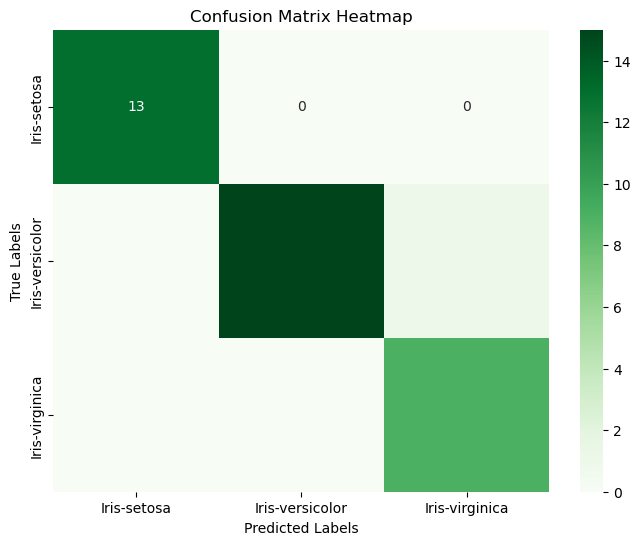

In [100]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Greens', 
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

## <font face="Times New Roman" color='orange ' > 4. Testing the model

In [101]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])

#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## <font face="Times New Roman" color='orange' > 5.  Save the model


In [102]:
#  We can save the model using pickle format.
# And again we can load the model in any other program using pickle and use it using model.
# predict to predict the iris data.

import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)
# Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## <font face="Times New Roman" color='orange ' > 6.Cross-validation

Accuracy: 0.9666666666666666


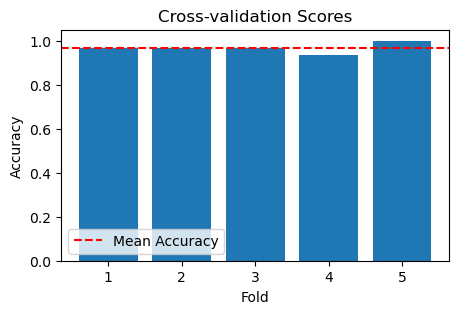

In [103]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, Y, cv=5)
print("Accuracy:", scores.mean())


plt.figure(figsize=(5, 3))
plt.bar(range(1, 6), scores)
plt.axhline(y=scores.mean(), color='r', linestyle='--', label='Mean Accuracy')
plt.title('Cross-validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## <font face="Times New Roman" color='orange ' > 7. Define the models and scores

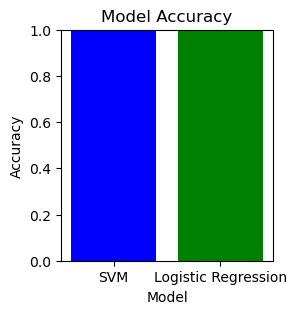

In [104]:
# Define the models and scores
models = ['SVM', 'Logistic Regression']
accuracy_scores = [1.0, 1.0]  # Accuracy on the test set for SVM and Logistic Regression
cross_val_scores = [None, None]  # Cross-validation scores for SVM and Logistic Regression

plt.figure(figsize=(6, 3))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.bar(models, accuracy_scores, color=['blue', 'green'])
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


## <font face="Times New Roman" color='orange ' > 8. Checking accuracy by Precision, Recall, F1-score


In [105]:
# 1. Precision, Recall, F1-score:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, pred, average='macro')
recall = recall_score(y_test, pred, average='macro')
f1 = f1_score(y_test, pred, average='macro')

# Print the results
print('Precision Score: ', precision)
print('Recall Score: ', recall)
print('F1 Score: ', f1)

Precision Score:  0.9666666666666667
Recall Score:  0.9791666666666666
F1 Score:  0.9717034521788342


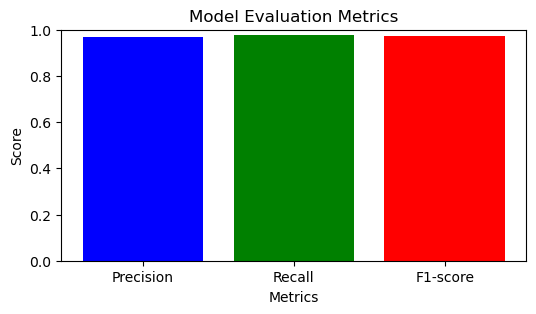

In [106]:
x = ['Precision', 'Recall', 'F1-score']
y = [precision, recall, f1]

# Plot the metrics
plt.figure(figsize=(6,3))
plt.bar(x, y, color=['blue', 'green', 'red'])
plt.ylim(0, 1)  # The scores are between 0 and 1
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.show()

# <font face="Times New Roman" color='purple ' > Conclusion
    
 The Iris Flower Classification project was successful in creating robust classification models using SVM (accuracy score 0.97)and Logistic Regression(accuracy score 0.97 ). Both models demonstrated excellent performance with high accuracy and consistent results across cross-validation folds. The use of cross validation ensured that the models were not overfitting and were generalizing well to unseen data.

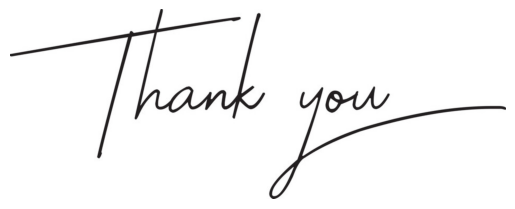

 Project done by Shukla, Shabnam 


In [107]:
a=mpimg.imread(r"C:\Users\DELL\Downloads\than.jpg")
plt.imshow(a)
plt.axis('off')
plt.show()
print(' Project done by Shukla, Shabnam ')